In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg
from skimage import data
from skimage.io import imread

<class 'numpy.ndarray'>
(480, 480)


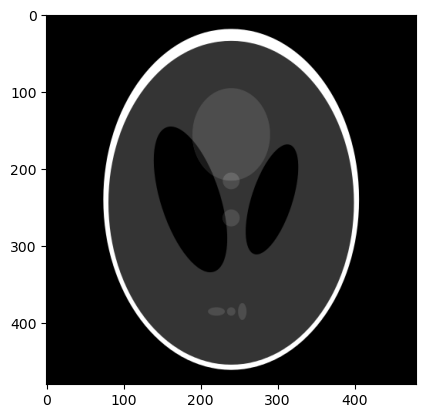

In [5]:
# Carica un'immagine in scala di grigi
# A = data.camera()
A = imread('phantom.png')

print(type(A))
print(A.shape)

# Visualizza l'immagine originale
plt.imshow(A, cmap='gray')
plt.show()

In [26]:
# Calcola la decomposizione SVD
U, s, Vh = scipy.linalg.svd(A, full_matrices=False)

print('Shape of U:', U.shape)
print('Shape of s:', s.shape)
print('Shape of V:', Vh.T.shape)

# Ricostruzione dell'immagine con p componenti
A_p = np.zeros(A.shape)
p_max = 480

for i in range(p_max):
    ui = U[:, i].reshape(-1, 1)
    vi = Vh[i, :].reshape(1, -1)
    A_p += s[i] * np.dot(ui, vi)

# Calcolo dell'errore relativo
err_rel = np.linalg.norm(A - A_p, 2) / np.linalg.norm(A, 2)

# Calcolo del fattore di compressione
c = (1 / p_max) * min(A.shape) - 1

print('\n')
print('L\'errore relativo della ricostruzione di A è', err_rel)
print('Il fattore di compressione è c=', c)


Shape of U: (480, 480)
Shape of s: (480,)
Shape of V: (480, 480)


L'errore relativo della ricostruzione di A è 1.1292605827107e-06
Il fattore di compressione è c= 0.0


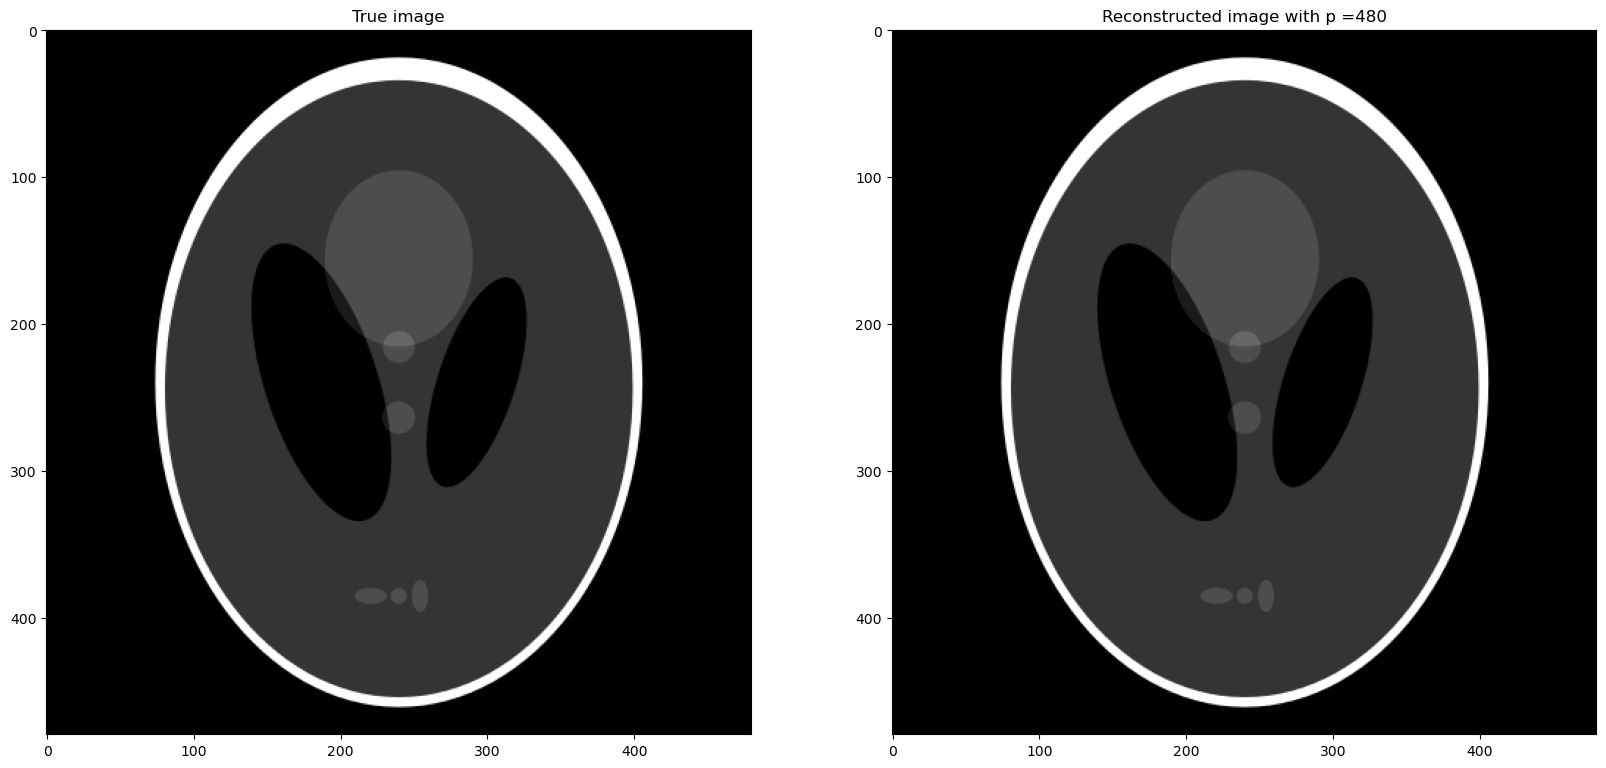

In [28]:
# Visualizzazione dell'immagine originale e ricostruita
plt.figure(figsize=(20, 10))

fig1 = plt.subplot(1, 2, 1)
fig1.imshow(A, cmap='gray')
plt.title('True image')

fig2 = plt.subplot(1, 2, 2)
fig2.imshow(A_p, cmap='gray')
plt.title('Reconstructed image with p =' + str(p_max))

plt.show()

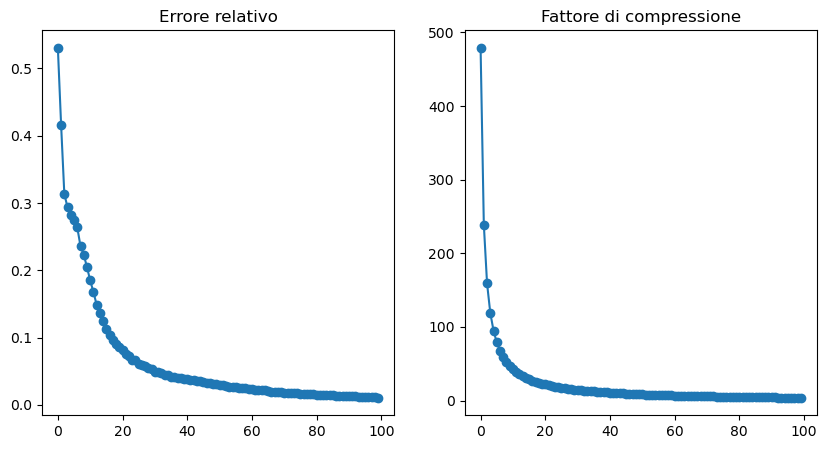

In [30]:
# Calcolo dell'errore relativo e del fattore di compressione al variare di p
p_max = 100
A_p = np.zeros(A.shape)
err_rel = np.zeros((p_max))
c = np.zeros((p_max))

for i in range(p_max):
    ui = U[:, i].reshape(-1, 1)
    vi = Vh[i, :].reshape(1, -1)
    A_p += s[i] * np.dot(ui, vi)
    
    err_rel[i] = np.linalg.norm(A - A_p, 2) / np.linalg.norm(A, 2)
    c[i] = (1 / (i + 1)) * min(A.shape) - 1

# Plot dell'errore relativo e del fattore di compressione
plt.figure(figsize=(10, 5))

fig1 = plt.subplot(1, 2, 1)
fig1.plot(err_rel, 'o-')
plt.title('Errore relativo')

fig2 = plt.subplot(1, 2, 2)
fig2.plot(c, 'o-')
plt.title('Fattore di compressione')

plt.show()